Atonia Andall 816009278

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
df = pd.read_csv('survey.csv')

In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


From the age summary data, we see there are some obvious outliers.  We can use the interquartile range to determine what is an outlier.  However, we can also use a generalization to correct for this.  Persons who work (varies from country to country) are typically at least 16 and at most 75 years old.

In [6]:
median = df[(df["Age"]<=75) & (df["Age"]>=16)].median()
df["Age"] = np.where(df["Age"] >75, median,df['Age'])
df["Age"] = np.where(df["Age"] <16, median,df['Age'])
df.describe()

,Age
count,1259.000000
mean,32.069897
std,7.265565
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [7]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
text = df.dtypes[df.dtypes=="object"].index
text

Index(['Timestamp', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [9]:
df[text].describe()

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-28 16:52:34,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


In [10]:
df["self_employed"].fillna(df["self_employed"].value_counts().index[0], inplace=True)
df["work_interfere"].fillna(df["work_interfere"].value_counts().index[0], inplace=True)

In [11]:
df = df.drop(["Timestamp", "Gender", "comments"], axis=1)

In [12]:
df[df.dtypes[df.dtypes=="object"].index].describe()

,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259,744,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,48,45,2,2,2,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,751,138,1113,767,637,729,290,883,1031,477,...,819,563,490,925,774,516,1008,557,576,1075


===============================================================================================================================

In [52]:
df["treatment"].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

We have a relatively equal distribution of persons who have and have not been treated for mental health issues.


Let's see a dristribution of who did the survey, their ages, family history and whether they got treatment

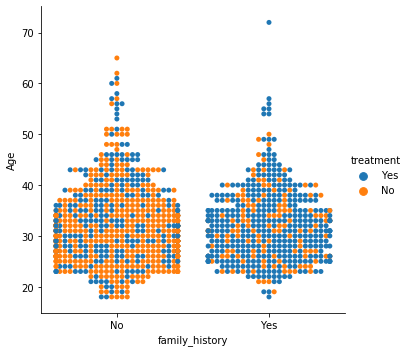

In [15]:
sns.catplot(x="family_history", y="Age", hue="treatment", kind="swarm", data=df);

We can see that the majority of persons with a family history of mental health issues have also seeked treatment for mental health issues. Lets look more closely at the age of persons seeking treatment 

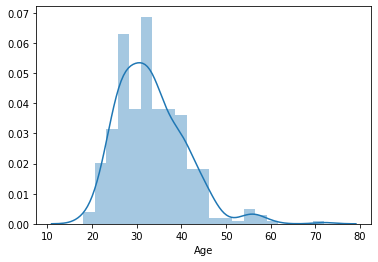

In [16]:
rel = df.where(df["treatment"]=="Yes")
rel = rel.dropna()
sns.distplot(rel.Age)

The majority of persons affected seeking treatment seem to be mid twenties to mid thirties.  This does not mean that more persons around this age have some sort of mental illness compared to other ages rather that this age group is more likely to seek treatment.

We want to see the geographic locations of persons who have been treated for/ diagnosed with a mental issue in the past.

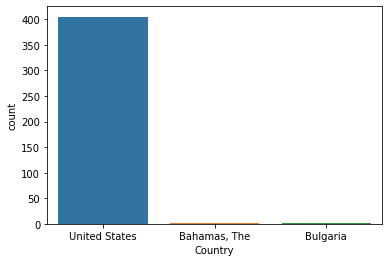

In [17]:
sns.countplot(x='Country', data=rel)

The majority of the persons treated are from the United States.  That does not necessitate that the United States has the highest rate of occurance of mental health issues.  Does America give more or less benefits as compared to the rest of the world?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

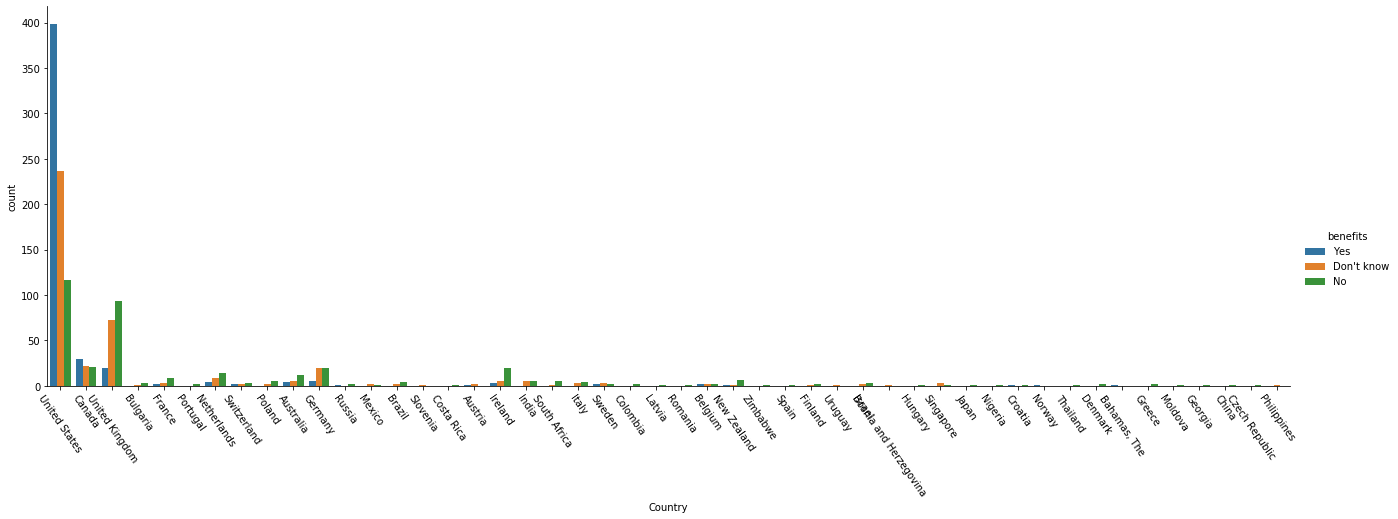

In [18]:
sns.catplot(x="Country", hue="benefits", kind="count", data=df ,height=6,aspect=3)
plt.xticks(rotation=-55)

America seems to offer the most benefits when compared to other countries.  However, there is an obvious bias towards America, seeing as the majority of data was collected from them.  Let's check the proportion of data that was American data.

In [19]:
df["Country"].describe()

count              1259
unique               48
top       United States
freq                751
Name: Country, dtype: object

We can see by looking at the country attribute that the majority of persons that did the survey are from the USA.  The highest occurance of treatment, from the survey, occurs in the United States.  Since the highest occurance of treatment occurs in the US, let us shift our attention to the US.  

In [20]:
american = rel.where(rel["Country"]=="United States")
american = american.dropna()
american.describe()

,Age
count,405.000000
mean,33.239506
std,7.626778
min,18.000000
25%,28.000000
50%,32.000000
75%,38.000000
max,72.000000


In [21]:
american[american.dtypes[american.dtypes=="object"].index].describe()

,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,405,405,405,405,405,405,405,405,405,405,...,405,405,405,405,405,405,405,405,405,405
unique,1,40,2,2,1,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No
freq,405,86,375,246,405,231,107,273,332,253,...,238,185,171,299,251,153,351,184,180,341


We don't have any null values for states so let's see how the geographical (state) distribution of persons getting treatment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

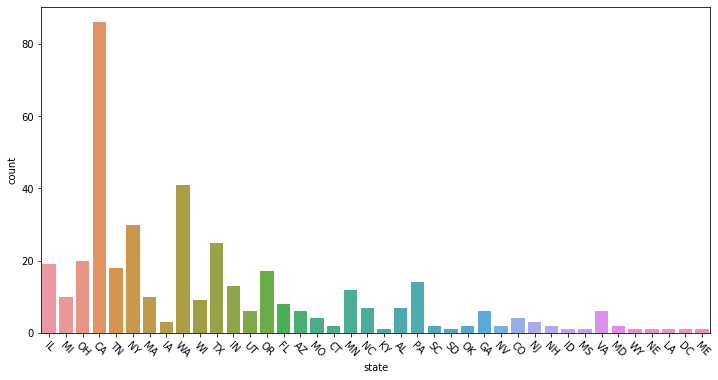

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=american, linewidth=30)
plt.xticks(rotation=-45)

The majority of persons who have been treated for/ diagnosed with a mental issue in the past are from California. Washington comes second, with only half the people as compared to California. Across states, do these people have benefits from work to get treatment?

In [23]:
all_american = df.where(df["Country"]=="United States")
all_american = all_american.dropna()
all_american.describe()

,Age
count,740.000000
mean,33.045946
std,7.568938
min,18.000000
25%,28.000000
50%,32.000000
75%,37.000000
max,72.000000


In [24]:
all_american[all_american.dtypes[all_american.dtypes=="object"].index].describe()

,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,740,740,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
unique,1,45,2,2,2,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,United States,CA,No,No,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No
freq,740,138,686,416,405,427,215,508,601,393,...,488,380,296,565,464,303,625,333,358,653


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

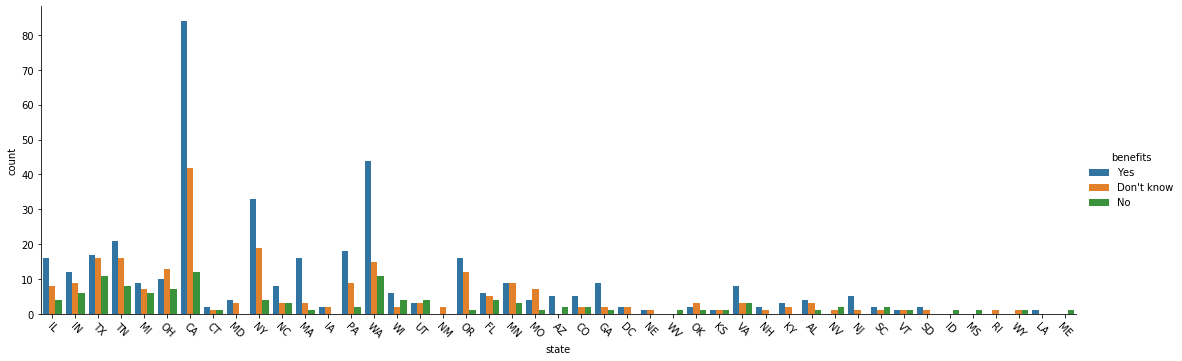

In [25]:
sns.catplot(x="state", hue="benefits", kind="count", data=all_american ,height=5,aspect=3)
plt.xticks(rotation=-45)

We can see that the most benefitss are provided at a highest rate in Californian companies, followed by Washington companies.  This follows the previous plot showing that more Californias have been treated for mental health problems compared to other states.  The presence of benefits within their places of work may be encouraging persons to take advantage of those benefits.  Let's see the skew of persons who have gotten treatment vs those who have benefits at their workplace.

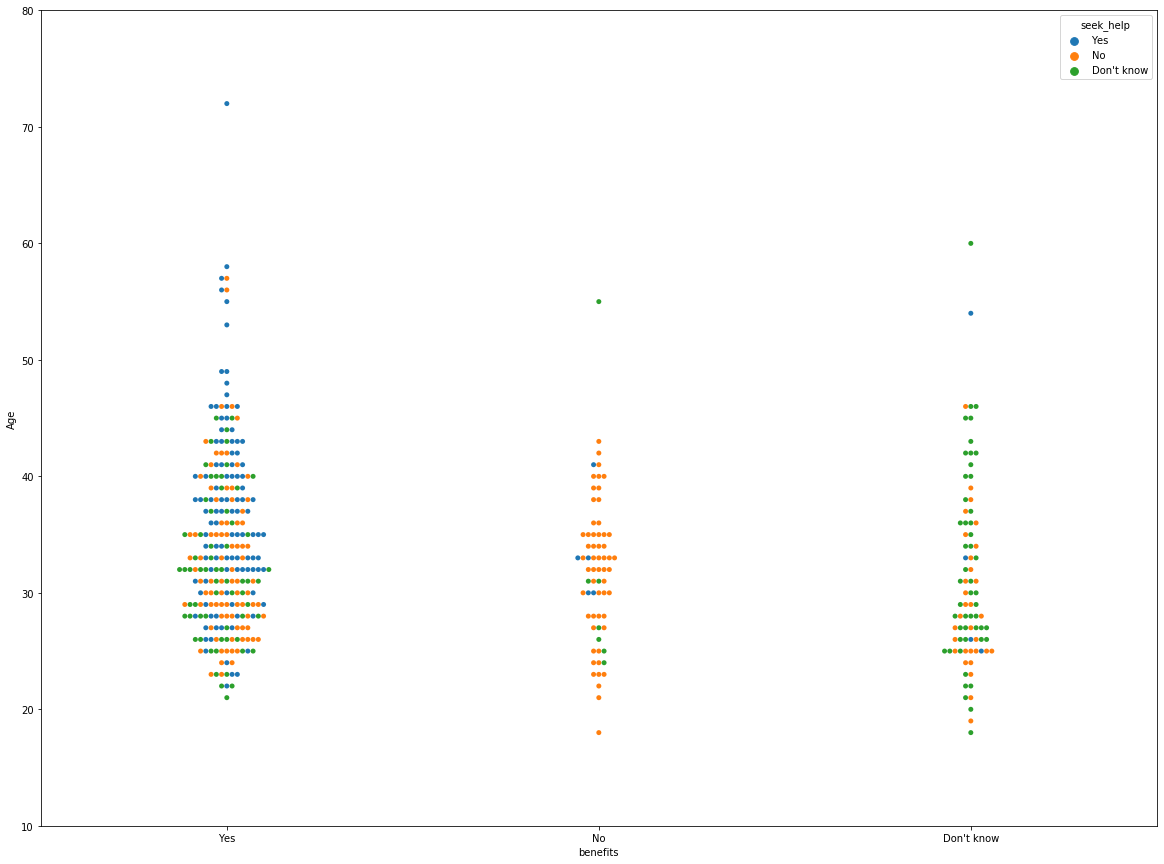

In [26]:
plt.figure(figsize=(20,15))
plt.ylim(10, 80)
sns.swarmplot(x='benefits', y='Age', data=american, 
              hue='seek_help')

Most persons seeking treatment in the United States have some sort of employee benefit that helps them to do so.   For employers offering no benefits, employees majoritily do not provide resources for persons to learn more about mental health or seek help.  Unsurprisingly, for employees who do not know if their employers offer benefits, they either don't know if their employer provides their resources or their employers do not.  Interestingly, for companies offering benefit, there isn't an overwhelming majority of employers providing mental health resources and information to their employees.

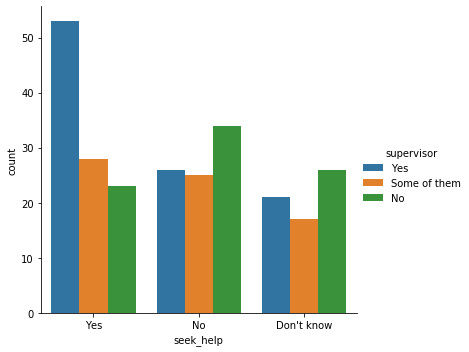

In [27]:
american_bene = american.where(df["benefits"]=="Yes")
american_bene = american_bene.dropna()
sns.catplot(x="seek_help", hue="supervisor", kind="count", data=american_bene);

The majority of American employees who are/have been on treatment and have benefits find it easy to speak to their supervisors about their mental health issues.  This can contribute to a better dissemination of information between supervisor and subordinate.  Persons who don't know if their employeers provide resources for persons seeking help and those whose employers do no provide resources majoritily find it difficult to speak to their supervisors about mental health issues.  In both these cases, this can mean that information dissemination about mental health benefits and support provided by the companies are hampered, especially in the case where employees do not knoe if their employers provide benefits.

Let's see if employment affects mental illness. Are persons working in tech companies more likely to be receiving treatment for mental illness? 

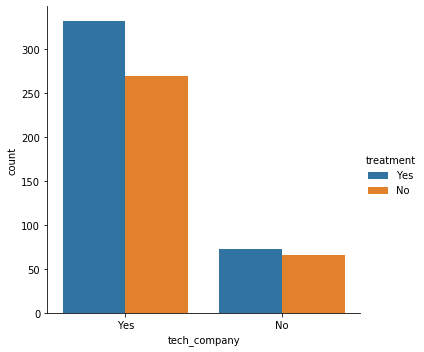

In [28]:
sns.catplot(x="tech_company", hue="treatment", kind="count", data=all_american);

There is slight increase in persons getting treatment vs not getting treatment for non-tech companies in the US. In tech companies, the difference between those getting treatment and not getting treatment is more distinct, with a noticeable increase in persons getting treatment.  However, this skew may be affected by a dramatic difference in persons being surveyed from tech companies vs those being surveyed different types of companies. 

Let's shift our focus primarily to tech companies.

In [29]:
tech = df.where(df["tech_company"]=="Yes")
tech = tech.dropna()
tech.describe()

,Age
count,605.000000
mean,32.894215
std,7.415666
min,18.000000
25%,27.000000
50%,32.000000
75%,37.000000
max,62.000000


In [30]:
tech = all_american.where(all_american["tech_company"]=="Yes")
tech = tech.dropna()
tech.describe()

,Age
count,601.000000
mean,32.928453
std,7.425847
min,18.000000
25%,27.000000
50%,32.000000
75%,37.000000
max,62.000000


Not much of a difference between size of all tech companies vs of only American tech companies.  American tech companies will be analyzed.

Let's see if most tech companies provide health benefits.

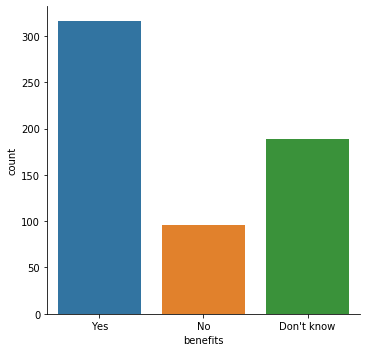

In [31]:
sns.catplot(x="benefits", kind="count", data=tech);

The majority of companies provide benefits.  However, a considerable number of employees do not know if their employer provides benefits.  This may signify a lack of information disemination within the company.

Let's see if the size of the company affects benefits for these companies and how knowledge of these benefits are distributed.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

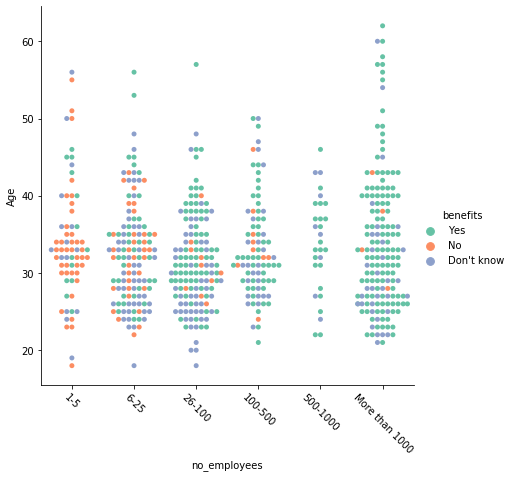

In [32]:
sns.catplot(x='no_employees', y='Age', data=tech, kind="swarm",  height=6, aspect=1,
              hue="benefits", order=['1-5','6-25','26-100','100-500', '500-1000','More than 1000'], palette="Set2")
plt.xticks(rotation=-45)

We can see that as the size of the company grows, it is more likely to offer benefits.  There is a high rate of employees not knowing if there are benefits for mid size companies (6 to 100 employees).  Information is possibly not dissemination as it should for these size companies compared to large companies.  It is interesting to note that most small companies (1-5 employees) do not have benefits.  Let's see if the proportion of persons not receiving benefits in small companies may be composed significantly of self employed persons.

In [33]:
small_comp = tech.where(tech["no_employees"]=="1-5")
small_comp = small_comp.dropna()
small_comp["self_employed"].describe()

count      68
unique      2
top       Yes
freq       37
Name: self_employed, dtype: object

More than half the persons working for small companies are self employed.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

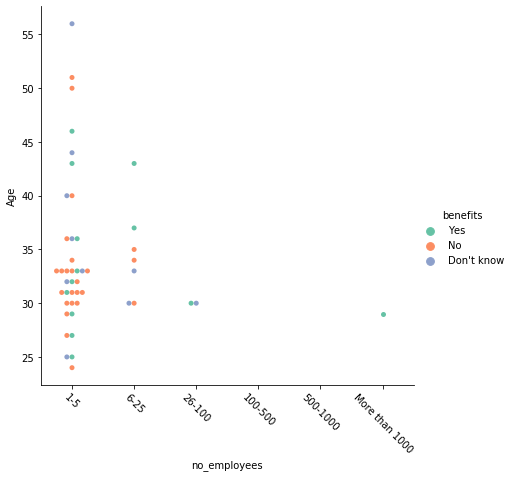

In [34]:
self_em = tech.where(tech["self_employed"]=="Yes")
self_em = self_em.dropna()
sns.catplot(x='no_employees', y='Age',data=self_em , kind="swarm",  height=6, aspect=1, hue="benefits", order=['1-5','6-25','26-100','100-500', '500-1000','More than 1000'], palette="Set2")
plt.xticks(rotation=-45)

The majority of self employed persons work in small companies and also do not have benefits.  These persons are therefore in charge of their own benefits and so have chosen not to include that.

From the data analysed, we see that large tech companies generally have benefits and their employees are well aware of their benefits.  In mid sized companies, persons are more likely to not know if they have benefits.  Small companies are majoritarily composed of self employed persons and usually these persons do not have benefits.

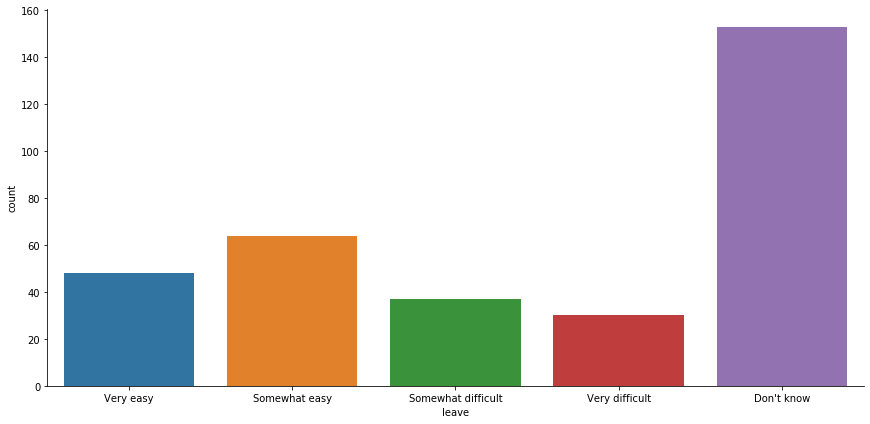

In [49]:
tech_treat = tech.where(tech["treatment"]=="Yes")
tech_treat = tech_treat.dropna()
sns.catplot(x="leave", kind="count", data=tech_treat, height=6, aspect=2, order=["Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult", "Don't know"]);

For persons previously/currently on treatment in tech companies, the majority of persons do not know how easy it is to take leave for a mental health conditions.  This may indicate that the majority of persons either a) have never needed to take time off for mental health issues or b) although they found it necessary to, have not tried.  This may indicate persons hesitating to take time for mental health issues.  Therefore we must ask, are these persons afraid to ask for leave?  In tech companies, at what rate do persons observe concequences for persons with mental health issues? 

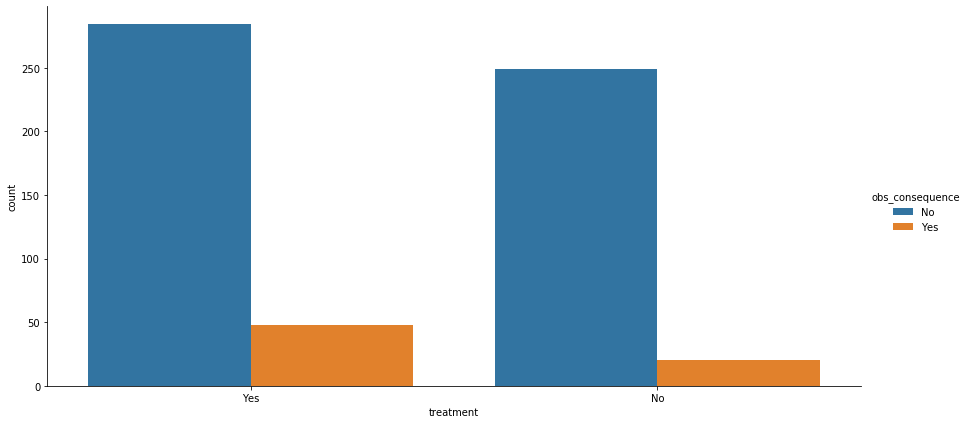

In [50]:
sns.catplot(x="treatment", kind="count", hue="obs_consequence", data=tech, height=6, aspect=2);

Despite still existing a portion of persons who have noticed negative concequences, these persons are in the minority.  Substantially more persons have not observed any sort of backlash, even when considering persons who would be more keen on noticing, ie, persons who have/are being treated for mental health issues.  It is noteworthy that the there is about double the number persons noticing negative treatment in the group of persons receiving treatment vs those who are not.  These persons may either be more keen to notice these concequences as they are also grouped in the same category or they have been mistreated themselves.  However, in tech companies in the United States, the majority of employees have not experienced/noticed negative concequences associated with having a mental health condition.